 # Introduction
 We are using Machine learning technique to determine the chances for getting kidney disease with features like age, bp and so forth.

In [95]:
!pip install dython # for plotting correlation between attributes 

In [96]:
# Import libraries and classes required for this:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from dython.nominal import associations
from pandas.api.types import is_string_dtype   
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [97]:
#import file
df = pd.read_csv('/kaggle/input/ckdisease/kidney_disease.csv')

# data frame info
print('data shape: ', df.shape)
print('data info: ', df.info())
print(df.columns)  # to print out all the attributes


data shape:  (400, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc          

In [98]:
print(df.head()) # to print out top 5 rows of the attributes

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [99]:
# dropping the id
# didnt contribute to the prediction
df = df.drop(['id'], axis=1)

In [100]:
# check attribute data types
print(df.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object


In [101]:
# checking unique value in each col
for i in df.columns:
    print('unique values in "{}":\n'.format(i),df[i].unique())

unique values in "age":
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
unique values in "bp":
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
unique values in "sg":
 [1.02  1.01  1.005 1.015   nan 1.025]
unique values in "al":
 [ 1.  4.  2.  3.  0. nan  5.]
unique values in "su":
 [ 0.  3.  4.  1. nan  2.  5.]
unique values in "rbc":
 [nan 'normal' 'abnormal']
unique values in "pc":
 ['normal' 'abnormal' nan]
unique values in "pcc":
 ['notpresent' 'present' nan]
unique values in "ba":
 ['notpresent' 'present' nan]
unique values in "bgr":
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79.

In [102]:
# eliminating the blank space in each cell
probColumns1 = ['rc','dm','cad','pcv','wc','classification']

for i in probColumns1:
    df[i] = df[i].str.replace('\t','')

df['dm'] = df['dm'].str.replace(' yes','yes')


In [103]:
# replacing the question mark with mean value
probColumns2 = ['rc','dm','cad','pcv','wc']

for i in probColumns2:
    df[i] = df[i].replace('?',np.mean(pd.to_numeric(df[i], errors='coerce')))

In [104]:
# forward filling the na value 
df = df.fillna(method="ffill",limit=1)

# replace the na value with mean
for i in df.columns:
#     if is_string_dtype(i):
#         df_clean = df.fillna(df.mean())
#     else:
        df_clean = df.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [105]:
# checking null value
df_clean.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [106]:
# getting the categorical columns
cols = df.columns
num_cols = df._get_numeric_data().columns
list(set(cols) - set(num_cols))


['htn',
 'ane',
 'pe',
 'ba',
 'pcv',
 'appet',
 'wc',
 'rbc',
 'pcc',
 'classification',
 'pc',
 'cad',
 'dm',
 'rc']

In [107]:
# label encoding the categorical data
lab = LabelEncoder()
catColumns = ['appet','ba','pc','ane','pe','cad','rbc','dm','pcc','htn','classification']

for i in catColumns:
    df_clean[i]= lab.fit_transform(df_clean[i])

# converting the column to float type
df_clean['pcv']=df_clean['pcv'].astype(float)
df_clean['wc']=df_clean['wc'].astype(float)
df_clean['rc']=df_clean['rc'].astype(float)


In [108]:
# check again the data
print(df_clean.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                 int64
pc                  int64
pcc                 int64
ba                  int64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                 int64
dm                  int64
cad                 int64
appet               int64
pe                  int64
ane                 int64
classification      int64
dtype: object


# Data visualisation

In [109]:
# grouping based on classification with  mean value of each category
df_clean.groupby('classification').mean()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
classification,,,,,,,,,,,,,,,,,,,,,
0,54.608000,79.16,1.014060,1.684,0.708,0.716,0.64,0.168,0.088,170.808000,...,10.762400,33.127076,9121.248980,4.25083,0.588,0.548,0.136,0.328,0.304,0.24
1,46.526667,71.40,1.022433,0.000,0.000,1.000,1.00,0.000,0.000,108.333333,...,15.183333,46.326667,7712.666667,5.37200,0.000,0.000,0.000,0.000,0.000,0.00


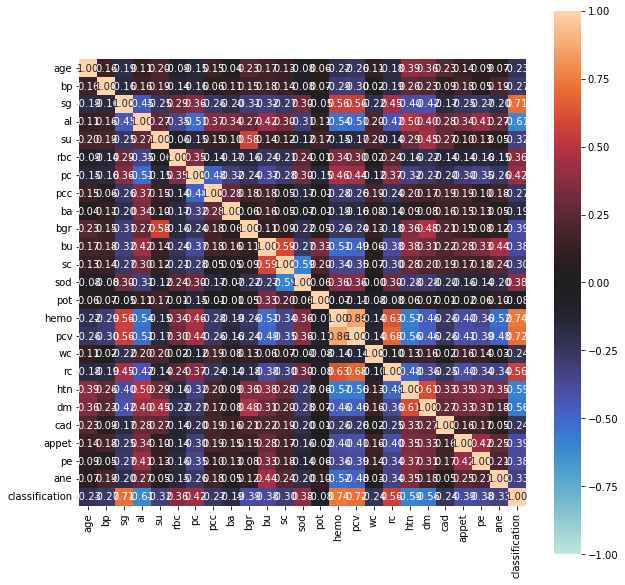

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
age,1.00,0.16,-0.19,0.11,0.20,-0.09,-0.15,0.15,0.04,0.23,0.17,0.13,-0.08,0.06,-0.22,-0.26,0.11,-0.18,0.39,0.36,0.23,0.14,0.09,0.07,-0.23
bp,0.16,1.00,-0.16,0.16,0.19,-0.14,-0.16,0.06,0.11,0.15,0.18,0.14,-0.08,0.07,-0.29,-0.30,0.02,-0.19,0.26,0.23,0.09,0.18,0.05,0.19,-0.27
sg,-0.19,-0.16,1.00,-0.45,-0.25,0.29,0.36,-0.26,-0.20,-0.31,-0.32,-0.27,0.30,-0.05,0.56,0.56,-0.22,0.45,-0.40,-0.42,-0.17,-0.25,-0.27,-0.20,0.71
al,0.11,0.16,-0.45,1.00,0.27,-0.35,-0.51,0.37,0.34,0.27,0.42,0.30,-0.31,0.11,-0.54,-0.51,0.20,-0.42,0.50,0.40,0.28,0.34,0.41,0.27,-0.61
su,0.20,0.19,-0.25,0.27,1.00,-0.06,-0.15,0.15,0.10,0.58,0.14,0.12,-0.12,0.17,-0.15,-0.17,0.20,-0.14,0.29,0.45,0.27,0.10,0.13,0.05,-0.32
rbc,-0.09,-0.14,0.29,-0.35,-0.06,1.00,0.35,-0.14,-0.17,-0.16,-0.24,-0.21,0.24,0.01,0.34,0.30,0.02,0.24,-0.16,-0.22,-0.14,-0.14,-0.16,-0.15,0.36
pc,-0.15,-0.16,0.36,-0.51,-0.15,0.35,1.00,-0.48,-0.32,-0.24,-0.37,-0.28,0.30,-0.15,0.46,0.44,-0.12,0.37,-0.32,-0.27,-0.20,-0.30,-0.35,-0.26,0.42
pcc,0.15,0.06,-0.26,0.37,0.15,-0.14,-0.48,1.00,0.28,0.18,0.18,0.05,-0.17,-0.01,-0.28,-0.26,0.19,-0.24,0.20,0.17,0.19,0.19,0.10,0.18,-0.27
ba,0.04,0.11,-0.20,0.34,0.10,-0.17,-0.32,0.28,1.00,0.06,0.16,0.05,-0.07,-0.01,-0.19,-0.16,0.08,-0.14,0.09,0.08,0.16,0.15,0.13,0.05,-0.19
bgr,0.23,0.15,-0.31,0.27,0.58,-0.16,-0.24,0.18,0.06,1.00,0.11,0.09,-0.22,0.05,-0.26,-0.24,0.13,-0.18,0.36,0.48,0.21,0.15,0.08,0.12,-0.39


In [110]:
# generating heatmap using dython 
complete_correlation= associations(df_clean, filename= 'complete_correlation.png', figsize=(10,10))
df_complete_corr=complete_correlation['corr']
df_complete_corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)


In [111]:
# remove the outliers using z score
df_numerical = df_clean.select_dtypes(exclude='object')
df_clean = df_clean[(np.abs(stats.zscore(df_numerical)) < 3).all(axis=1)]

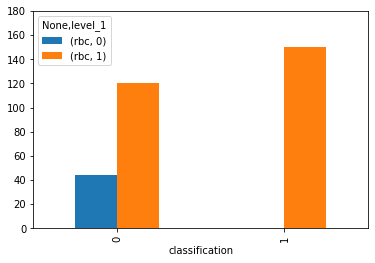

In [112]:
# total of rbc & classification 
pd.DataFrame(df_clean.groupby('classification')['rbc'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

plt.show()

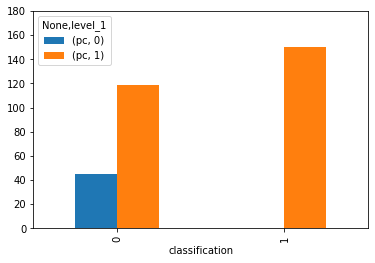

In [113]:
# total of pc & classification 
pd.DataFrame(df_clean.groupby('classification')['pc'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

plt.show()

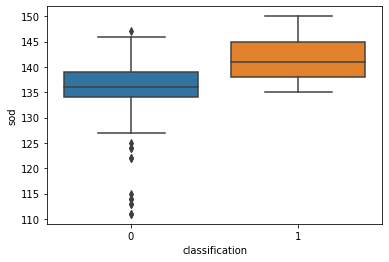

In [114]:
# sod vs classification
sns.boxplot(
    data=df_clean, x="classification", y="sod")
plt.show()

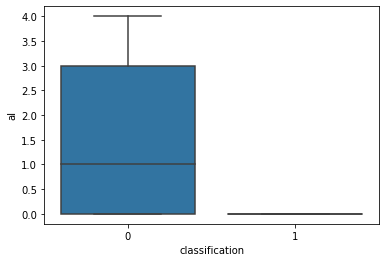

In [115]:
# al vs classification
sns.boxplot(
    data=df_clean, x="classification", y="al")

plt.show()

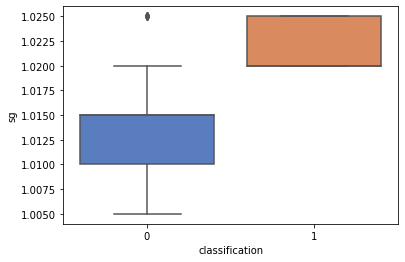

In [116]:
# sg & classification 
sns.boxplot(data=df_clean,
            x="classification",
            y="sg",
            palette = "muted"
           )
plt.show()


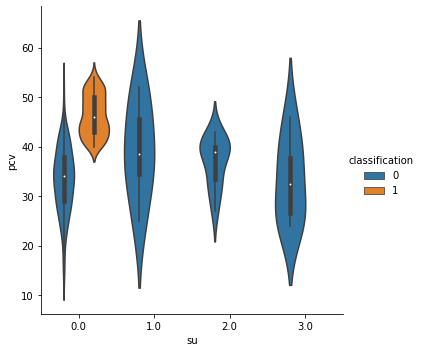

In [117]:
# su, pcv & classification 
sns.catplot(data=df_clean, kind="violin", x="su", y="pcv", hue="classification")
plt.show()


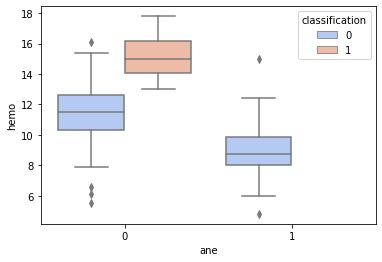

In [118]:
# hemo, ane & classification
sns.boxplot(x="ane", y="hemo", hue="classification",data=df_clean, palette="coolwarm")
plt.show()


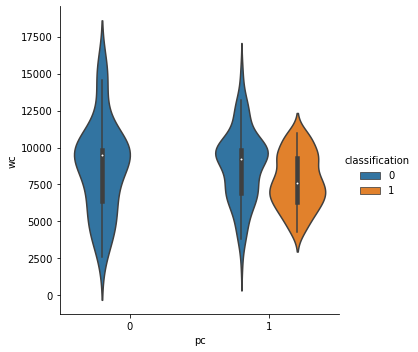

In [119]:
# pc, wc & classification
sns.catplot(data=df_clean, kind="violin", x="pc", y="wc", hue="classification")
plt.show()

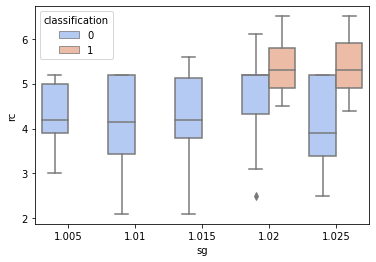

In [120]:
# sg, rc & classification
sns.boxplot(x="sg", y="rc",hue = 'classification',data=df_clean, palette="coolwarm")
plt.show()

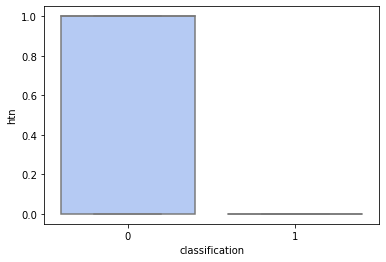

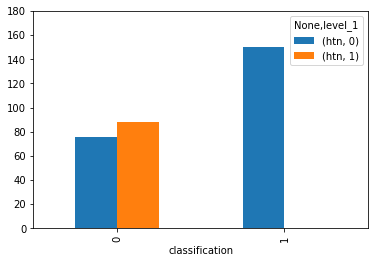

In [121]:
# htn & classification
sns.boxplot(x="classification", y="htn",data=df_clean, palette="coolwarm")
plt.show()

# total of htn & classification
pd.DataFrame(df_clean.groupby('classification')['htn'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

# htn dm
plt.show()

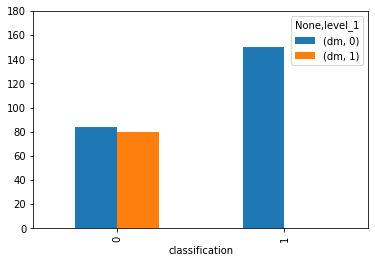

In [122]:
# total of dm & classification
pd.DataFrame(df_clean.groupby('classification')['dm'].apply(lambda x: x.value_counts())).reset_index().pivot(
    index = 'classification', columns = 'level_1').plot.bar(stacked=False)
plt.yticks(range(0, 200, 20))

plt.show()


Feature Selection

In [123]:
df_final =  df_clean.drop(['age','bp','al','su','pcc','ba','bgr','bu','sc','pot','wc','htn','dm','cad','appet','pe','ane'], axis=1)

In [124]:
df_final.shape

(314, 8)

# Splitting training & test data 

In [125]:
from sklearn.model_selection import train_test_split


In [126]:
# Split dataset into random train and test subsets:
X = df_final.iloc[:, :-1].values
y = df_final.iloc[:, -1].values 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 


print(X.shape, y.shape)
print(X_train[:5, :])
print(y_train[:5])

(314, 7) (314,)
[[  1.015   1.      1.    137.     11.9    39.      5.2  ]
 [  1.02    1.      1.    141.     15.     48.      5.2  ]
 [  1.01    0.      1.    139.      8.     24.      3.3  ]
 [  1.02    1.      1.    138.     13.     38.      4.6  ]
 [  1.02    1.      1.    127.     15.     41.      5.2  ]]
[0 1 0 0 0]


# Model Training and Evaluation

In [127]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics # for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score


In [128]:
# checking model accuracy, mae, rme, rmse, and generate classification report 
def prediction_plot(model,X_train, X_test, y_train, y_test):
    y_pred = model.predict(X_test)
    df_ans = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
    print(df_ans)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print(classification_report(y_test, y_pred))

In [129]:
# confusion matrix plot
def conf(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.set_xlabel('Predicted outputs', color='black')
    ax.set_ylabel('Actual outputs',  color='black')
    ax.xaxis.set(ticks=range(2))
    ax.yaxis.set(ticks=range(2))
    # ax.set_ylim(9.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
    plt.show()


KNN

    Actual  Predicted
0        0          0
1        1          1
2        1          1
3        0          0
4        0          0
..     ...        ...
58       1          1
59       0          0
60       1          1
61       1          1
62       0          0

[63 rows x 2 columns]
Accuracy: 0.9682539682539683
Mean Absolute Error: 0.031746031746031744
Mean Squared Error: 0.031746031746031744
Root Mean Squared Error: 0.1781741612749496
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.94      1.00      0.97        31

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



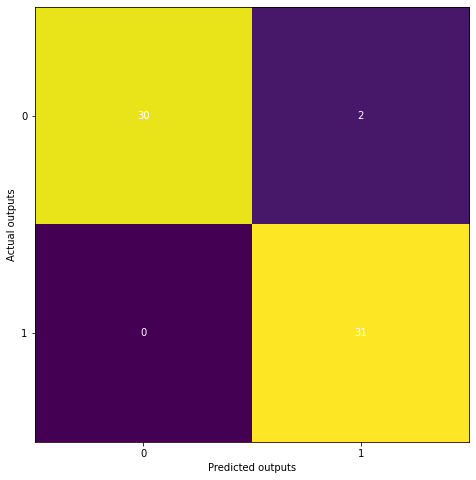

In [130]:
# fit the model
#KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)


Logistic Regression

    Actual  Predicted
0        0          0
1        1          1
2        1          1
3        0          0
4        0          0
..     ...        ...
58       1          1
59       0          0
60       1          1
61       1          1
62       0          0

[63 rows x 2 columns]
Accuracy: 0.9682539682539683
Mean Absolute Error: 0.031746031746031744
Mean Squared Error: 0.031746031746031744
Root Mean Squared Error: 0.1781741612749496
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.97      0.97      0.97        31

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



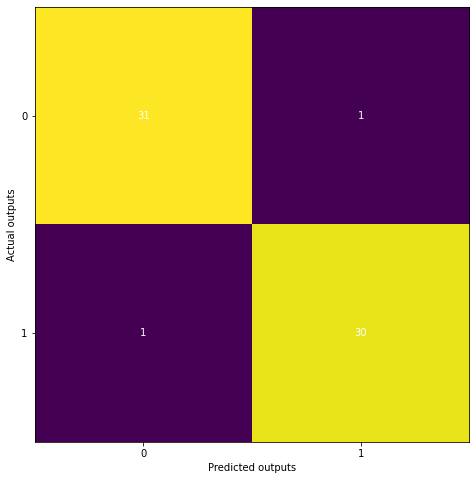

In [131]:
#Logistic Regression
model= LogisticRegression(random_state=0, max_iter= 1000)  
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)

Decision Tree

    Actual  Predicted
0        0          0
1        1          1
2        1          1
3        0          0
4        0          0
..     ...        ...
58       1          1
59       0          0
60       1          1
61       1          1
62       0          0

[63 rows x 2 columns]
Accuracy: 0.9682539682539683
Mean Absolute Error: 0.031746031746031744
Mean Squared Error: 0.031746031746031744
Root Mean Squared Error: 0.1781741612749496
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       1.00      0.94      0.97        31

    accuracy                           0.97        63
   macro avg       0.97      0.97      0.97        63
weighted avg       0.97      0.97      0.97        63



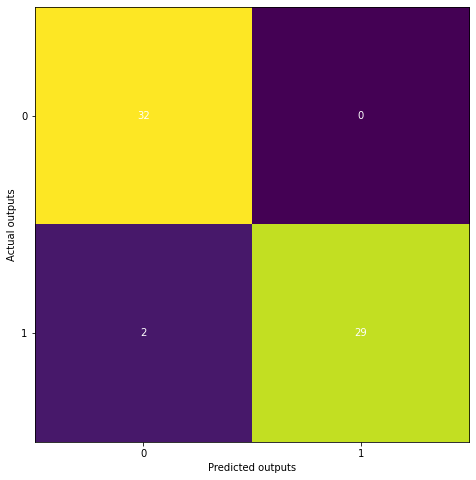

In [132]:
#Decision Tree
model= DecisionTreeClassifier(random_state=0)  
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)

Bagging classifier ensemble learning

    Actual  Predicted
0        0          0
1        1          1
2        1          1
3        0          0
4        0          0
..     ...        ...
58       1          1
59       0          0
60       1          1
61       1          1
62       0          0

[63 rows x 2 columns]
Accuracy: 0.9841269841269841
Mean Absolute Error: 0.015873015873015872
Mean Squared Error: 0.015873015873015872
Root Mean Squared Error: 0.12598815766974242
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.97      0.98        31

    accuracy                           0.98        63
   macro avg       0.98      0.98      0.98        63
weighted avg       0.98      0.98      0.98        63



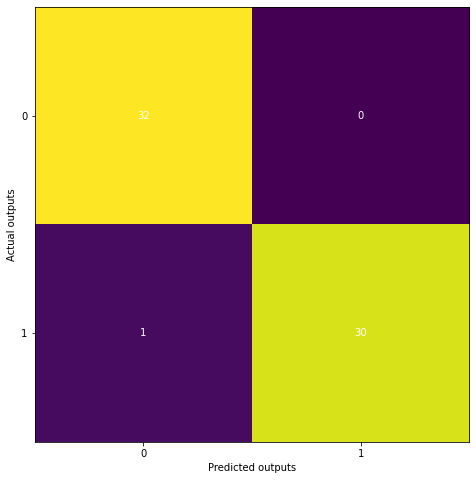

In [133]:
# bagging classifier 
# ensemble learning with decision tree
# no. of base classifier
num_trees = 100
base_cls = DecisionTreeClassifier()
seed = 8
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = num_trees,
                          random_state = seed)
history = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
prediction_plot(model,X_train, X_test, y_train, y_test)
conf(y_test, y_pred)

In [134]:
# learning with n estimator
estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

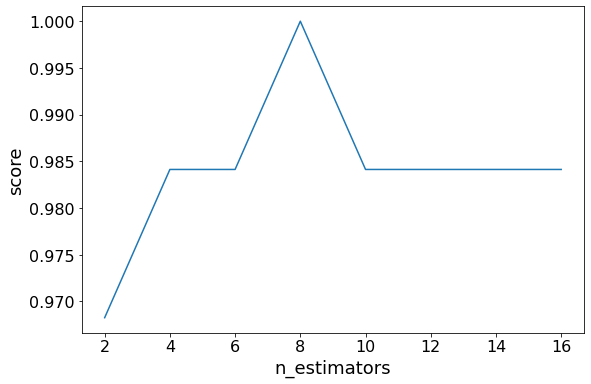

In [135]:
# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

# If you find this useful, please do upvote me. Your support will definitely aspire me to come out with more content. TQ